In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("iris.csv")
data = df.drop(["Id"], axis=1)
X = data.drop(["Species"], axis=1)
y = data["Species"]
X = X.values
y = y.values
Y = pd.get_dummies(y, dtype = int)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # X là mảng numpy hoặc pandas
Y = Y.values
X, Y = shuffle(X_scaled, Y, random_state=42)

In [2]:
input_layer = 4
hidder_layer = 20 #chỉnh từ 10 tới 20
output_layer = 3

In [3]:
def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    x = np.clip(x, 1e-6, 1 - 1e-6)
    return x * (1 - x)

In [4]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # chống overflow
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [5]:
def intitial_W():
    W_1 = np.random.rand(hidder_layer, input_layer)
    W_2 = np.random.rand(output_layer, hidder_layer)
    b_1 = np.random.rand(hidder_layer)
    b_2 = np.random.rand(output_layer)
    return W_1, W_2, b_1, b_2

In [6]:

def forward_propagation(X, W_1, W_2, b_1, b_2):
    Z1 = np.dot(X, W_1.T) + b_1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W_2.T) + b_2
    A = softmax(Z2)
    cache = [Z1, A1, Z2, A]
    return cache

def loss_function(Y, A):
    epsilon = 1e-12  # tránh log(0)
    A = np.clip(A, epsilon, 1 - epsilon)  # bảo vệ khỏi log(0)
    return -np.mean(np.sum(Y * np.log(A), axis=1))


def backward_propagation(A, Y, X, cache, param):
    m = A.shape[0]
    W_1, W_2, b_1, b_2 = param
    Z1, A1, Z2, A = cache
    # dA = loss_devarite(Y, A)  #(4,1)
    dZ2 = A - Y
    dW_2 = (1/m)*np.dot(dZ2.T, A1)
    db_2 = (1/m)*np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W_2)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW_1 = (1/m)*np.dot(dZ1.T, X)
    db_1 = (1/m)*np.sum(dZ1, axis=0, keepdims=True)
    gra = [dW_1, db_1, dW_2, db_2]
    return gra

def update_param(W_1, W_2, b_1, b_2, grad, learning_rate = 0.3):
    W_1 = W_1 - learning_rate * grad[0]
    W_2 = W_2 - learning_rate * grad[2]
    b_1 = b_1 - learning_rate * grad[1]
    b_2 = b_2 - learning_rate * grad[3]
    return W_1, W_2, b_1, b_2

In [7]:
# epoch = 10000
# W_1, W_2, b_1, b_2 = intitial_W() #khởi tạo 1 lần xong nhớ cmt lại để train 100000 epoch ok
# for i in range(epoch):
#     cache = forward_propagation(X_train, W_1, W_2, b_1, b_2)
#     loss = loss_function(Y_train,cache[3])
#     param = [W_1, W_2, b_1, b_2]
#     gradient = backward_propagation(cache[3],Y_train, X_train, cache, param)
#     W_1, W_2, b_1, b_2 = update_param(W_1, W_2, b_1, b_2, gradient,0.05)
#     print(loss)

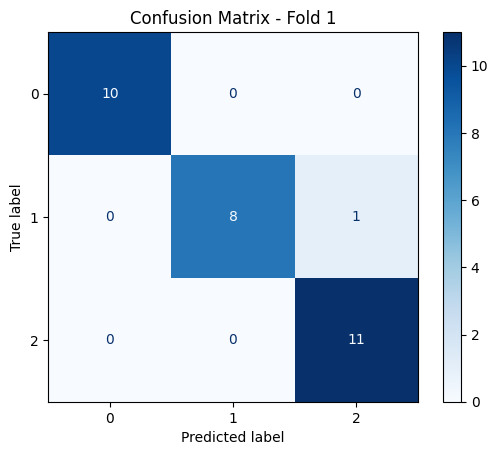

Fold 1:
Accuracy: 0.9667
Precision: 0.9694
Recall: 0.9667
--------------------------------------------------


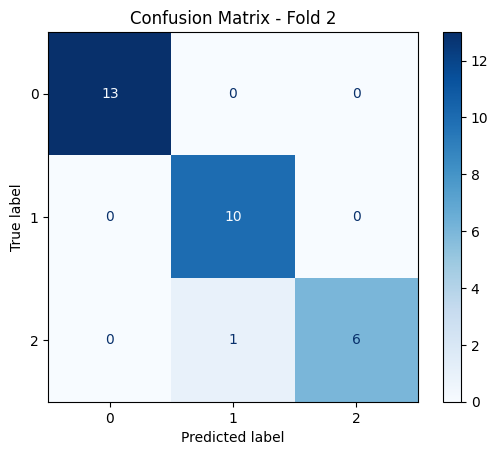

Fold 2:
Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667
--------------------------------------------------


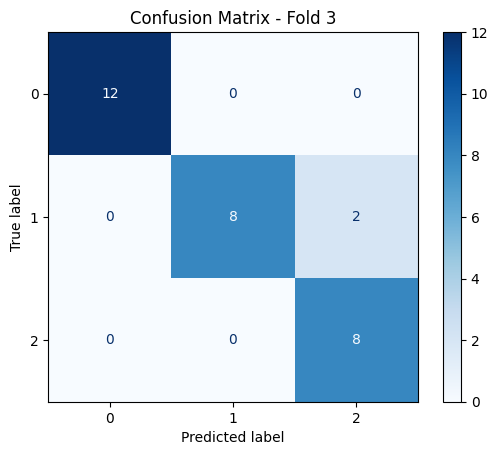

Fold 3:
Accuracy: 0.9333
Precision: 0.9467
Recall: 0.9333
--------------------------------------------------


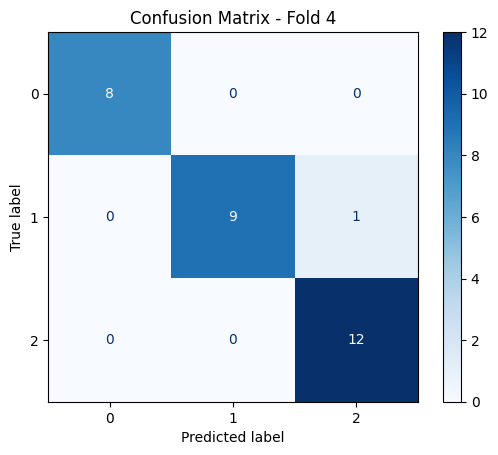

Fold 4:
Accuracy: 0.9667
Precision: 0.9692
Recall: 0.9667
--------------------------------------------------


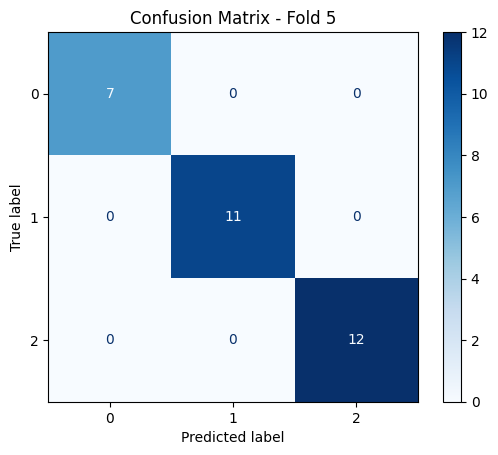

Fold 5:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
--------------------------------------------------
Average metrics across 5 folds:
Average Accuracy: 0.9667
Average Precision: 0.9710
Average Recall: 0.9667


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

ln = 0.1
epoch = 10000

accuracies = []
precisions = []
recalls = []

for fold in range(5):
    X_val = X[fold*30 : fold*30 + 30, :]
    Y_val = Y[fold*30 : fold*30 + 30, :]
    X_train = np.concatenate((X[:fold*30, :], X[fold*30 + 30:, :]), axis=0)
    Y_train = np.concatenate((Y[:fold*30, :], Y[fold*30 + 30:, :]), axis=0)

    W_1, W_2, b_1, b_2 = intitial_W()

    for e in range(epoch):
        cache = forward_propagation(X_train, W_1, W_2, b_1, b_2)
        loss = loss_function(Y_train, cache[3])

        param = [W_1, W_2, b_1, b_2]
        gradient = backward_propagation(cache[3], Y_train, X_train, cache, param)

        W_1, W_2, b_1, b_2 = update_param(W_1, W_2, b_1, b_2, gradient, ln)

    # Dự đoán trên tập validation
    cache_val = forward_propagation(X_val, W_1, W_2, b_1, b_2)
    y_pred = np.argmax(cache_val[3], axis=1)  # Dự đoán lớp có xác suất cao nhất
    y_true = np.argmax(Y_val, axis=1)        # Lớp thực tế

    # Tính ma trận nhầm lẫn
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()

    # Tính Accuracy, Precision, Recall
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')  # Tính trung bình có trọng số
    recall = recall_score(y_true, y_pred, average='weighted')        # Tính trung bình có trọng số

    # Lưu kết quả cho fold này
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    print(f"Fold {fold+1}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("-" * 50)

# Tính trung bình của tất cả các fold
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)

print("Average metrics across 5 folds:")
print(f"Average Accuracy: {mean_accuracy:.4f}")
print(f"Average Precision: {mean_precision:.4f}")
print(f"Average Recall: {mean_recall:.4f}")


In [18]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.utils import to_categorical
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
#
# # Tải bộ dữ liệu Iris
# iris = load_iris()
# X = iris.data  # Đặc trưng
# y = iris.target  # Nhãn
#
# # Chuyển nhãn thành mã hóa one-hot
# y = to_categorical(y, num_classes=3)
#
# # Chia dữ liệu thành tập huấn luyện và kiểm tra
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# # Chuẩn hóa dữ liệu (Standardization)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
#
# # Xây dựng mô hình ANN
# model = Sequential()
#
# # Lớp Dense đầu tiên với 10 nơ-ron, hàm kích hoạt sigmoid
# model.add(Dense(10, input_dim=4, activation='sigmoid'))
#
# # Lớp Dense thứ hai (lớp ra) với 3 nơ-ron (mã hóa one-hot), hàm kích hoạt softmax
# model.add(Dense(3, activation='softmax'))
#
# # Biên dịch mô hình với learning_rate thay vì lr
# model.compile(optimizer=SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
#
# # Huấn luyện mô hình
# history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))
#
# # Đánh giá mô hình trên tập kiểm tra
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test accuracy: {accuracy * 100:.2f}%')


Epoch 1/100


C:\Users\minhn\anaconda3\envs\pythonproject\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3397 - loss: 1.1226 - val_accuracy: 0.4000 - val_loss: 1.0648
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4334 - loss: 1.0417 - val_accuracy: 0.6333 - val_loss: 1.0022
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6528 - loss: 0.9927 - val_accuracy: 0.8667 - val_loss: 0.9505
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7348 - loss: 0.9419 - val_accuracy: 0.8667 - val_loss: 0.9023
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7099 - loss: 0.9112 - val_accuracy: 0.8000 - val_loss: 0.8563
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8046 - loss: 0.8506 - val_accuracy: 0.8333 - val_loss: 0.8161
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8357 - loss: 0.8217 - val_accuracy: 0.8333 - val_loss: 0.7769
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8441 - loss: 0.7874 - val_accuracy: 0.8333 - val_loss: 0

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2]])